In [1]:
from random import randint

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
alphabets_data = pd.read_csv('A_Z Handwritten Data.csv', header = None)

alphabets_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
368041,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167734,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353010,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305262,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221522,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273725,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215887,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210453,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41359,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30640,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alphabets_data.shape

(372451, 785)

* This is as good dataset to work with Autoencoders you can observe in the shape there are 372451 rows and 785 columns


* This image dataset comprises of grey scale images


* Every record in this dataset is singel channel representation of image i.e the intensity of the image


* Every values in the dataset is a pixel value


* 784 columns in the dataset reprasent the pixel value and the first column is representing label associated with each image of Handwritten alphabets. The labels range from 0 to 25 corresponding to each letter of the alphabet

In [4]:
alphabets_data = alphabets_data.sample(frac = 0.05).reset_index(drop = True)

alphabets_data.shape

(18623, 785)

* Here we are not woriking on the entire data, just we are taking 5% of the entire data

In [5]:
sorted(alphabets_data[0].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [8]:
lookup = { 0: 'A', 1: 'B', 2: 'C', 3: 'D', 
         4: 'E', 5:'F', 6:'G', 7:'H', 8:'I',
         9: 'J', 10:'K', 11:'L', 12:'M', 13:'N',
         14: 'O', 15: 'P', 16:'Q', 17:'R', 18:'S',
         19: 'T', 20:'U',21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

In [9]:
features = alphabets_data[alphabets_data.columns[1:]]

target = alphabets_data[0]

In [10]:
features.shape

(18623, 784)

In [11]:
features = features.values.reshape(len(features), 28, 28)

In [12]:
features.shape

(18623, 28, 28)

In [13]:
target.loc[10]

18

In [14]:
features[10][10:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        171, 250, 255, 174,  60,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 163,
        248, 255, 190,  63,  11,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 169, 247,
        255, 255, 206, 150, 149, 107,  94,  52,  13,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 246, 255,
        255, 255, 255, 255, 255, 224, 214, 177, 126,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  78,  66,  14,   0,   0,   0,  49, 210, 220,
        190, 164, 134, 134, 134, 134, 170, 214, 237, 160,  24,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 183, 189, 126,  63,   4,   0,   6,  89, 101,
         67,  37,   3,   3,   3,   3,  43,  96, 197, 252, 100,   0,   0,
          0,   0],
       [  

* You can observe the pixels values range from 0 255

In [15]:
def show_image(features, actual_label):
    
    print("Actual Label", lookup[actual_label])
    
    plt.imshow(features, cmap = 'Greys')
    
    plt.show()

Actual Label S


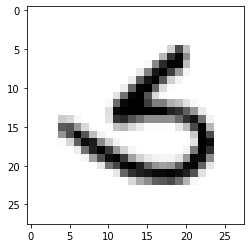

In [16]:
show_image(features[10], target[10])

Actual Label N


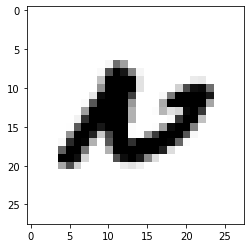

In [17]:
show_image(features[20], target[20])

In [18]:
features = features.astype(np.float32)/255

* Here we are scaling the image so that the range will come in 0 to 1

In [19]:
features[10][10:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13725491, 0.67058825, 0.98039216,
        1.        , 0.68235296, 0.23529412, 0.02745098, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.6392157 , 0.972549  , 1.        ,
        0.74509805, 0.24705882, 0.04313726, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.6627451 , 0.96862745, 1.        , 1.        ,
        0.80784315, 0.5882

* Now our pixel values are in between 0 to 1

In [20]:
from sklearn.model_selection import train_test_split

train_images,test_images, train_labels, test_labels = train_test_split(features, target, test_size = 0.2) 

In [21]:
train_images.shape

(14898, 28, 28)

In [22]:
test_images.shape

(3725, 28, 28)

In [26]:
stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape = [28,28]),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    
    
    layers.Dense(16, activation = 'relu')
      
])

In [27]:
stacked_encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


In [31]:
stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation = 'relu', input_shape = [16]),
    
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(28 * 28, activation = 'relu'),
    
    layers.Reshape([28, 28])
])

In [32]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 16)                52848     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            53616     
Total params: 106,464
Trainable params: 106,464
Non-trainable params: 0
_________________________________________________________________


In [34]:
# keras.utils.plot_model(ae_model, expand_nested = True, show_shapes = True)

In [35]:
ae_model.compile(loss = 'mean_squared_error',
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['mse'])

In [36]:
training_hist = ae_model.fit(train_images,train_images, epochs = 20, verbose = True)

Epoch 1/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0639 - mse: 0.0639
Epoch 2/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0453 - mse: 0.0453
Epoch 3/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0397 - mse: 0.0397
Epoch 4/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0361 - mse: 0.0361
Epoch 5/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0337 - mse: 0.0337
Epoch 6/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0311 - mse: 0.0311
Epoch 7/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0299 - mse: 0.0299
Epoch 8/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0290 - mse: 0.0290
Epoch 9/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0283 - mse: 0.0283
Epoch 10/20
466/466 [==============================] - 1s 1ms/step - loss: 0.0278 - mse: 0.0278
Epoch 11/20
466/466 [============================

In [40]:
 def reconstruct_img(model, images, n_imgs):
        
        random_int = randint(0, images.shape[0] - n_imgs)
        
        reconstructions = model.predict(images[random_int : random_int + n_imgs])
        
        fig = plt.figure(figsize = (n_imgs * 3, 3))
        
        for img_index in range(n_imgs):
            plt.subplot(2, n_imgs, 1+img_index)
            plt.imshow(images[random_int + img_index], cmap = 'Greys')
            
            plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
            
            plt.imshow(reconstructions[img_index], cmap = 'Greys')

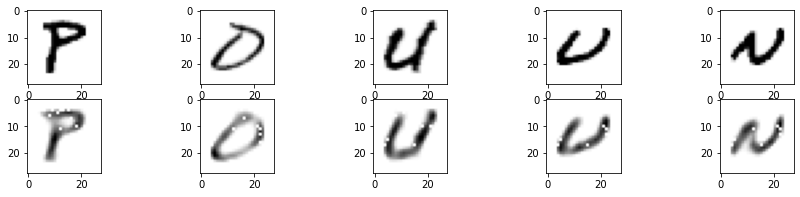

In [41]:
reconstruct_img(ae_model, test_images, 5)

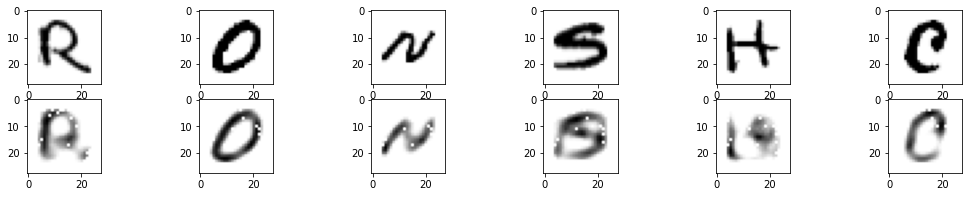

In [42]:
reconstruct_img(ae_model, test_images , 6)

* The first row in the above images is original data and the second row is the reconstructed images on the original data by using autoencoder(which is combination of both encoding i.e encoder and decoding i.e decoder) and Sequential Dense layer

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

* Convolutional Neural Network works better with images compared to Sequential Dense Neural Network, Now will build a model with Convolution Neural Network on image data of Handwritten Alphabets 

In [63]:
conv_encoder = tf.keras.models.Sequential([
    
    layers.Reshape([28, 28, 1], input_shape = [28, 28]),
    
    layers.Conv2D(16, kernel_size = 3, padding = 'SAME', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(32, kernel_size = 3, padding = 'SAME', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(64, kernel_size = 3, padding = 'SAME', activation = 'relu'),
    layers.MaxPool2D(pool_size = 2)
])

In [64]:
conv_decoder = tf.keras.models.Sequential([
    
    layers.Conv2DTranspose(32, kernel_size = 3, strides = 2, padding = 'VALID', 
                           activation = 'relu', 
                           input_shape = [3, 3, 64]),
    
    layers.Conv2DTranspose(16, kernel_size = 3, padding = 'SAME', strides = 2, activation = 'relu'),
    
    
    layers.Conv2DTranspose(1, kernel_size = 3, padding = 'SAME', strides = 2, activation = 'sigmoid'),

    layers.Reshape([28, 28])
])

* The encoder and decoder are Sequential models 


* Reshape([28, 28, 1]) is Height, Width, and number of channels of an image(if number of channel = 1 that is an Grey scale image, if channel = 3 that is colord image of Red, Green and Blue)


* For every convolutional layer in Encoder we have inverse of every layer in Decoder that is Transpose on every corresponding Encoder layer


* The objective of the Decoder in autoencoder is to reconstruct the original image from it's Latent features



In [65]:
conv_ae_model = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_15 (Sequential)   (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [66]:
conv_ae_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(lr = 1.0),
                     metrics = ['mse'])

In [67]:
training_hist_convAE = conv_ae_model.fit(train_images, train_images, epochs = 10)

Epoch 1/10
466/466 [==============================] - 6s 13ms/step - loss: 0.2816 - mse: 0.0659
Epoch 2/10
466/466 [==============================] - 6s 13ms/step - loss: 0.1496 - mse: 0.0247
Epoch 3/10
466/466 [==============================] - 6s 14ms/step - loss: 0.1299 - mse: 0.0179
Epoch 4/10
466/466 [==============================] - 7s 14ms/step - loss: 0.1192 - mse: 0.0142
Epoch 5/10
466/466 [==============================] - 6s 14ms/step - loss: 0.1129 - mse: 0.0121
Epoch 6/10
466/466 [==============================] - 6s 14ms/step - loss: 0.1087 - mse: 0.0107
Epoch 7/10
466/466 [==============================] - 6s 14ms/step - loss: 0.1052 - mse: 0.0096
Epoch 8/10
466/466 [==============================] - 6s 14ms/step - loss: 0.1029 - mse: 0.0089
Epoch 9/10
466/466 [==============================] - 7s 14ms/step - loss: 0.1012 - mse: 0.0083
Epoch 10/10
466/466 [==============================] - 7s 14ms/step - loss: 0.0997 - mse: 0.0078


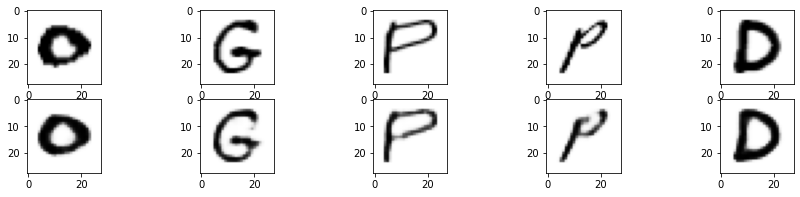

In [68]:
reconstruct_img(conv_ae_model, test_images, 5)

* By viewing the results of images we can say that Convolutional Neural Network based Autoencoders has performed far better at reconstructing the images than the Simple Stacked Autoencoders 

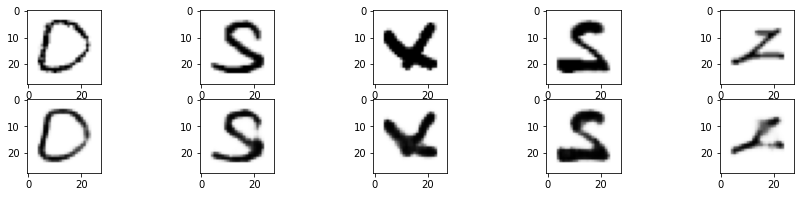

In [69]:
reconstruct_img(conv_ae_model, test_images, 5)